# Project 2 : Medical Cost Personal Insurance Project

In [1]:
# 1st step : I import all the important Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('health_insurence.csv')
print(df.shape)
df.head(10)

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# EDA :

<Axes: xlabel='age', ylabel='charges'>

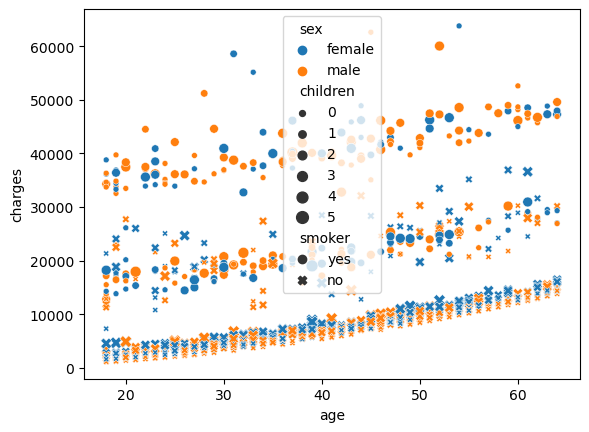

In [6]:
sns.scatterplot(data=df, x='age', y='charges', hue='sex' , style = 'smoker' , size =  'children')

In [7]:
# Our analysis :
# 1 . The more age , the more charges
# 2. People who are smokers , their charges are more 
# 3. more charges are there where there is no children  

<Axes: xlabel='bmi', ylabel='charges'>

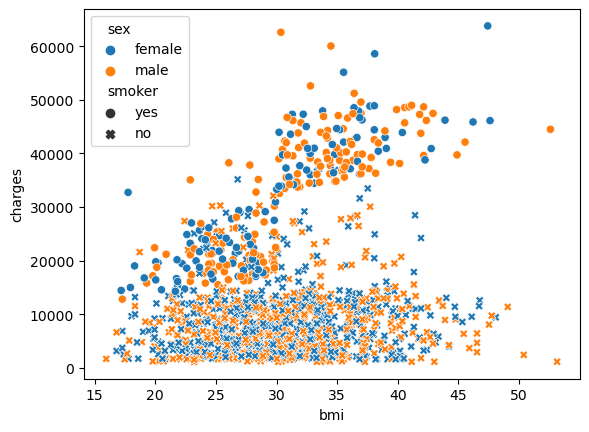

In [8]:
sns.scatterplot(data = df , x = 'bmi' , y = 'charges' , hue =  'sex' , style ='smoker')

In [9]:
# My observation :
# 4. Most of the bmi is in the range 0 to 12000 but people who are smokers have more charges and in this case , bmi and charges are directly proportional

<Axes: xlabel='region', ylabel='charges'>

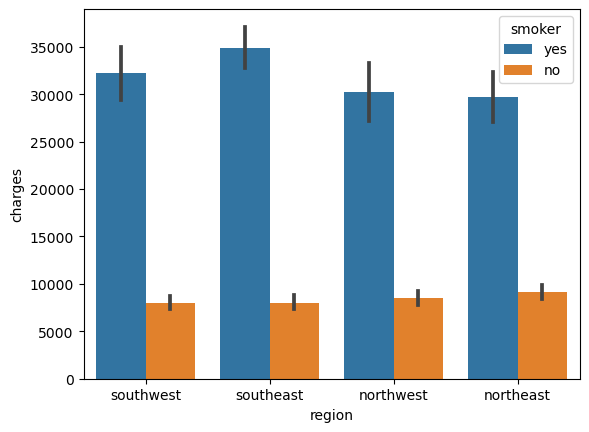

In [10]:
sns.barplot(data = df , x = 'region' , y = 'charges' , hue = 'smoker')

In [11]:
# My observation :
# 5 : People who are from southeast region have more charges because more smokers arethere in southeast region 

<Axes: xlabel='sex', ylabel='charges'>

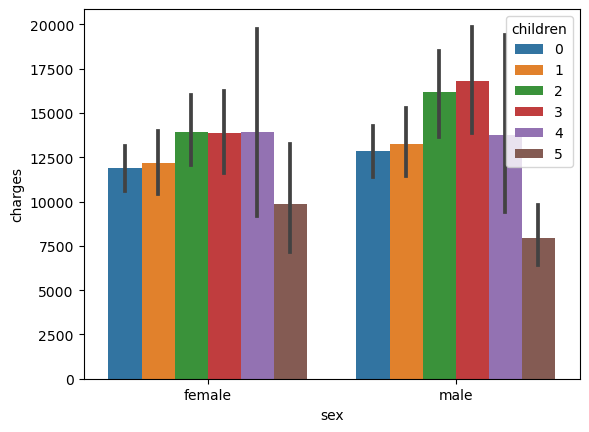

In [12]:
sns.barplot(data = df , x = 'sex' , y = 'charges' , hue = 'children') 

In [13]:
# My observations :
# 6 : People who are male and having 3 children has higher charges

<Axes: xlabel='sex', ylabel='charges'>

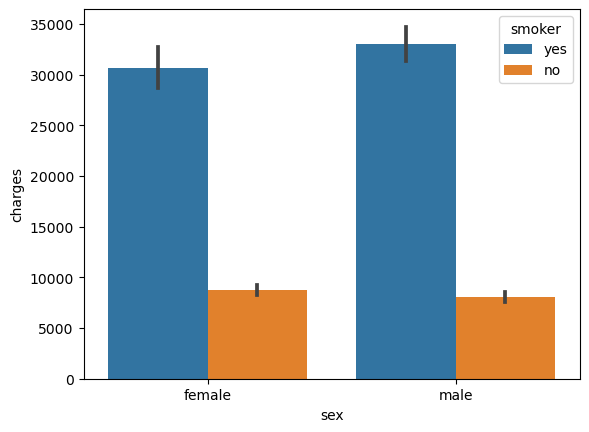

In [14]:
sns.barplot(data = df , x = 'sex' , y = 'charges' , hue = 'smoker') 

# Column Transformation :

In [15]:
LE = LabelEncoder()
df['Sex'] = LE.fit_transform(df['sex'])
df['Smoker'] = LE.fit_transform(df['smoker'])
df['Region'] = LE.fit_transform(df['region'])
df = df.drop(columns = ['sex','smoker','region'] , axis = 1)
df

,age,bmi,children,charges,Sex,Smoker,Region
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1
1334,18,31.920,0,2205.98080,0,0,0
1335,18,36.850,0,1629.83350,0,0,2
1336,21,25.800,0,2007.94500,0,0,3


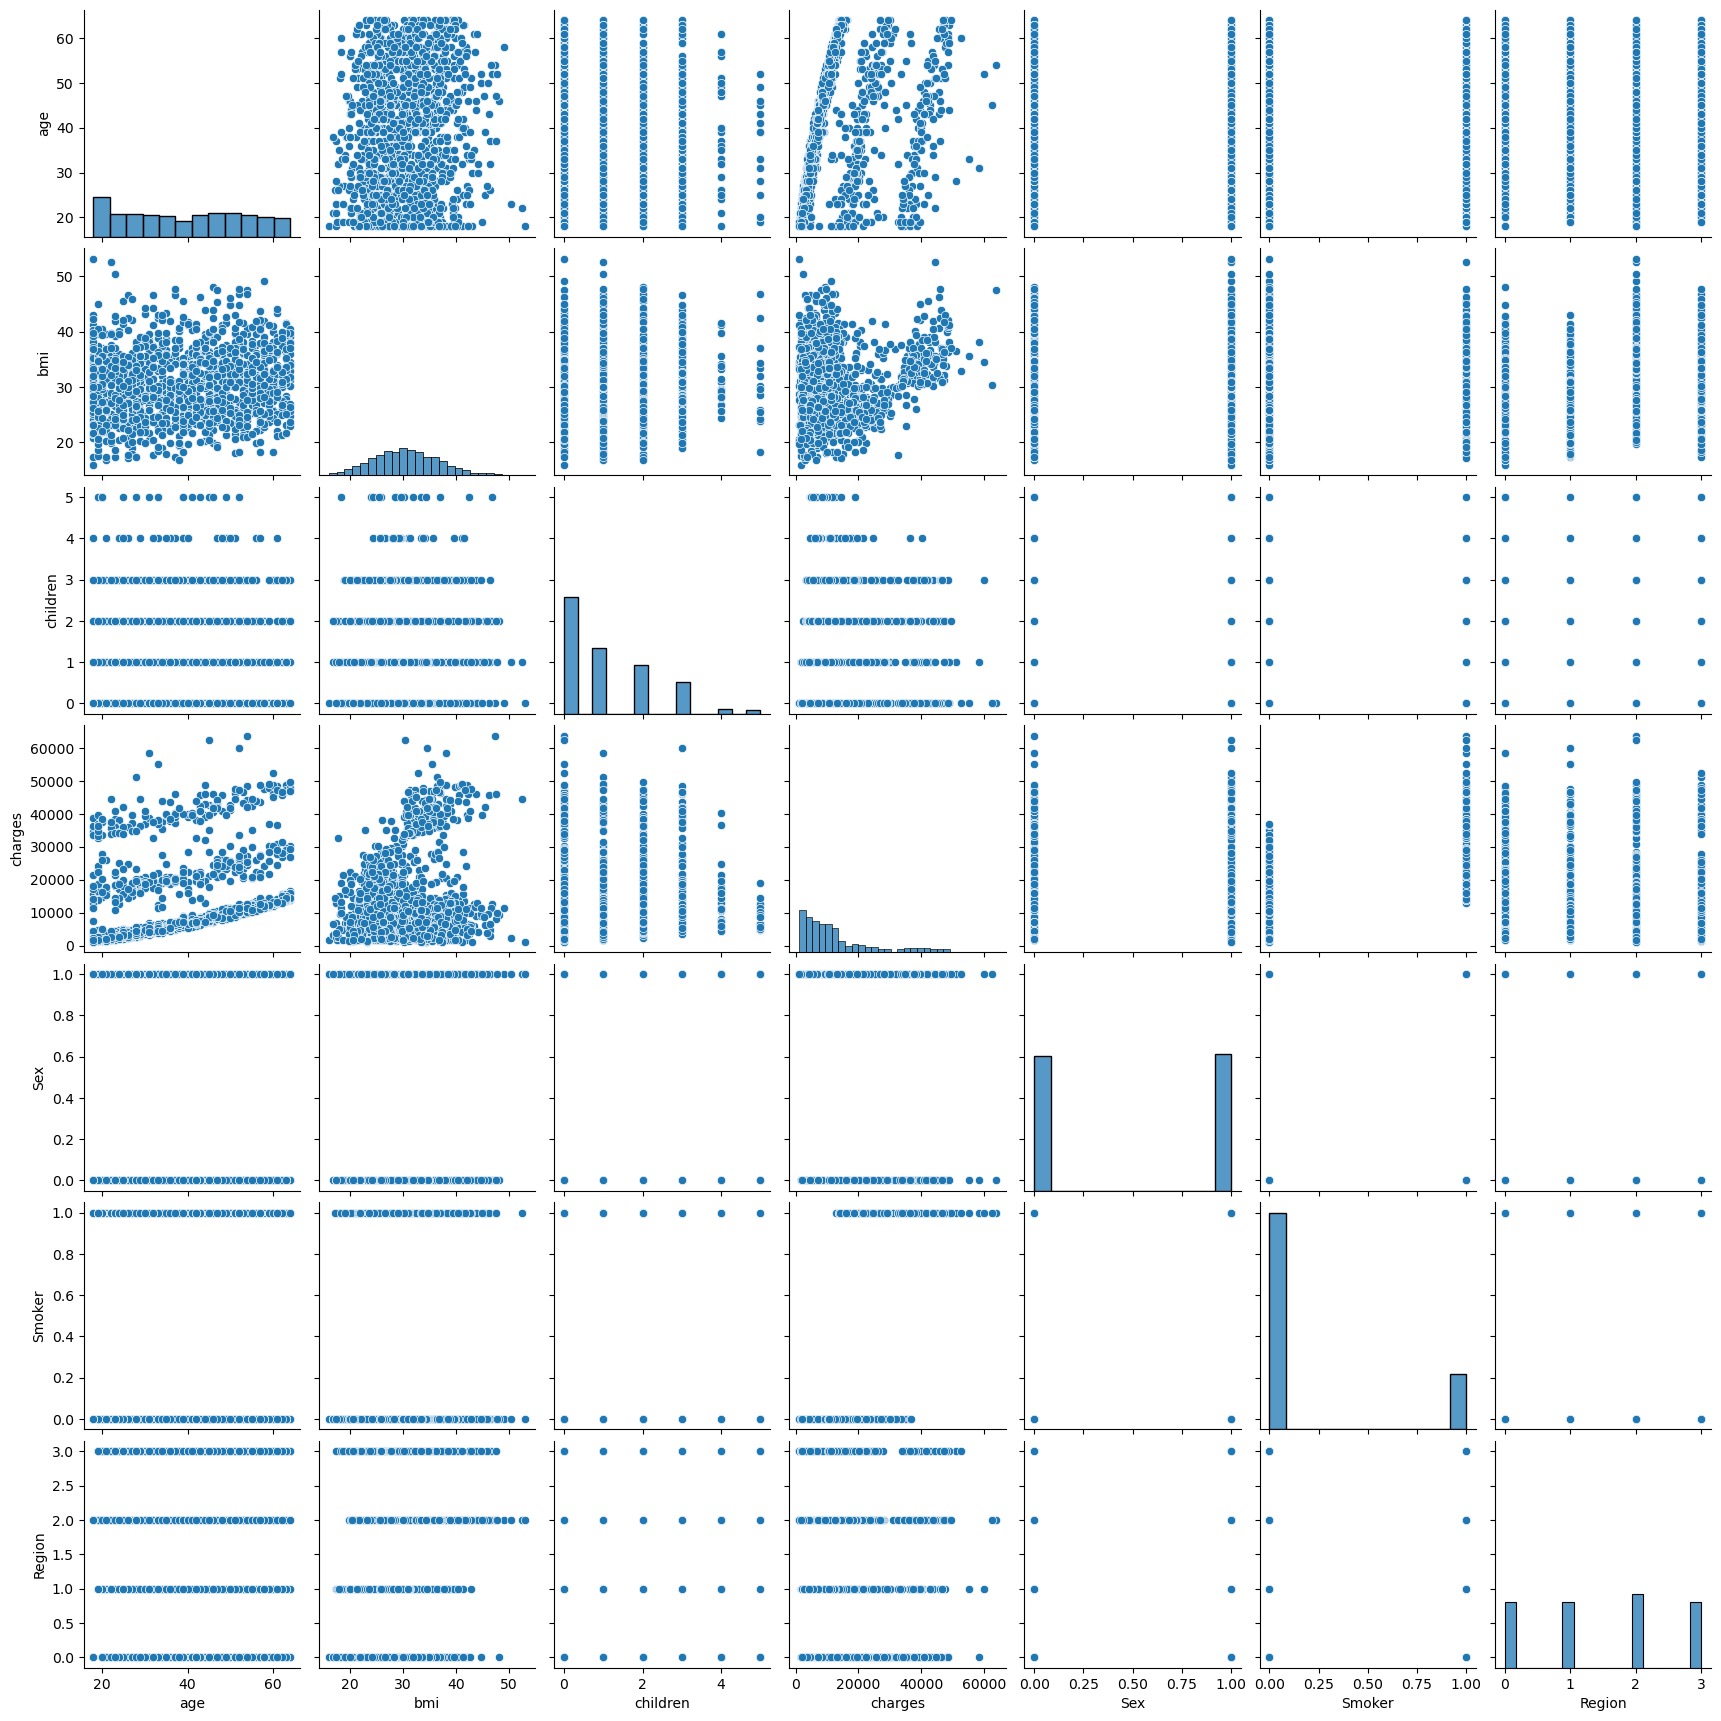

In [16]:
sns.pairplot(df)

# Outliers Handeling

age            Axes(0.125,0.53;0.133621x0.35)
bmi         Axes(0.285345,0.53;0.133621x0.35)
children     Axes(0.44569,0.53;0.133621x0.35)
charges     Axes(0.606034,0.53;0.133621x0.35)
Sex         Axes(0.766379,0.53;0.133621x0.35)
Smoker         Axes(0.125,0.11;0.133621x0.35)
Region      Axes(0.285345,0.11;0.133621x0.35)
dtype: object

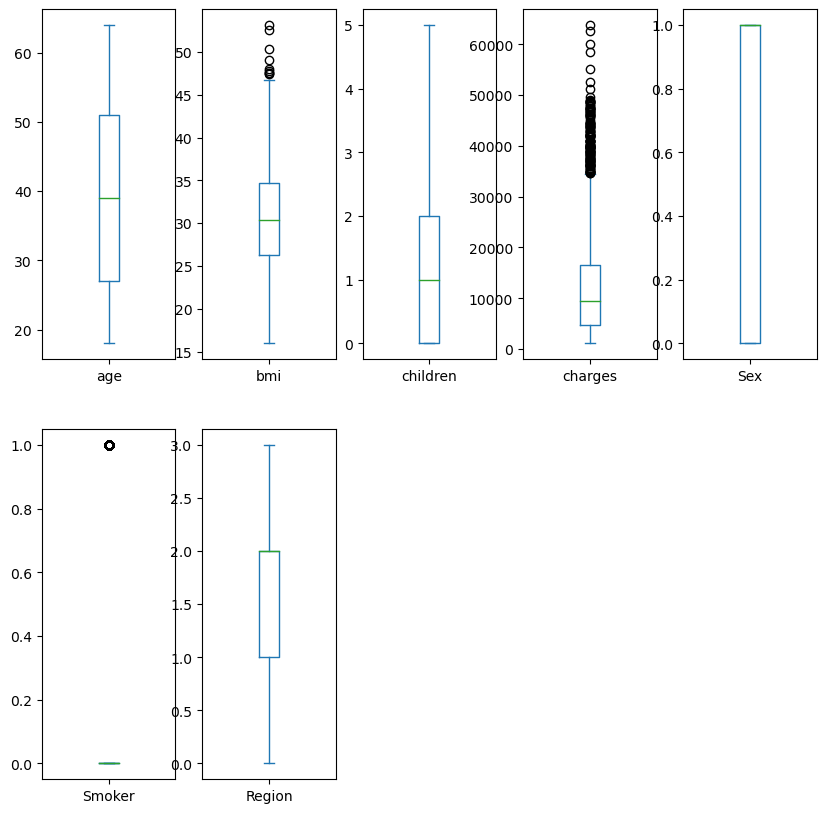

In [17]:
df.plot(kind = 'box', subplots = True ,layout = (2,5), figsize = (10,10))

In [18]:
df.describe()

,age,bmi,children,charges,Sex,Smoker,Region
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,1.515695
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,1.104885
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,2.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


In [19]:
z = np.abs(zscore(df))
z

,age,bmi,children,charges,Sex,Smoker,Region
0,1.438764,0.453320,0.908614,0.298584,1.010519,1.970587,1.343905
1,1.509965,0.509621,0.078767,0.953689,0.989591,0.507463,0.438495
2,0.797954,0.383307,1.580926,0.728675,0.989591,0.507463,0.438495
3,0.441948,1.305531,0.908614,0.719843,0.989591,0.507463,0.466915
4,0.513149,0.292556,0.908614,0.776802,0.989591,0.507463,0.466915
...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,0.220551,0.989591,0.507463,0.466915
1334,1.509965,0.206139,0.908614,0.914002,1.010519,0.507463,1.372326
1335,1.509965,1.014878,0.908614,0.961596,1.010519,0.507463,0.438495
1336,1.296362,0.797813,0.908614,0.930362,1.010519,0.507463,1.343905


In [20]:
threshold = 3
print(np.where(z>3))

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
       1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64), array([2, 3, 2, 1, 2, 2, 2, 2, 3, 2, 3, 2, 3, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 3, 3, 2, 2, 3, 1], dtype=int64))


In [21]:
new_df = df[(z<3).all(axis = 1)]
new_df

,age,bmi,children,charges,Sex,Smoker,Region
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1
1334,18,31.920,0,2205.98080,0,0,0
1335,18,36.850,0,1629.83350,0,0,2
1336,21,25.800,0,2007.94500,0,0,3


In [22]:
new_df.describe()

,age,bmi,children,charges,Sex,Smoker,Region
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,39.262032,30.584037,1.045073,13089.622269,0.502674,0.202445,1.505730
std,14.085397,5.975320,1.124627,11738.168486,0.500184,0.401975,1.105037
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.315000,0.000000,4686.388700,0.000000,0.000000,1.000000
50%,39.000000,30.305000,1.000000,9377.904700,1.000000,0.000000,2.000000
75%,51.000000,34.580000,2.000000,16577.779500,1.000000,0.000000,2.000000
max,64.000000,48.070000,4.000000,49577.662400,1.000000,1.000000,3.000000


<Axes: xlabel='age', ylabel='charges'>

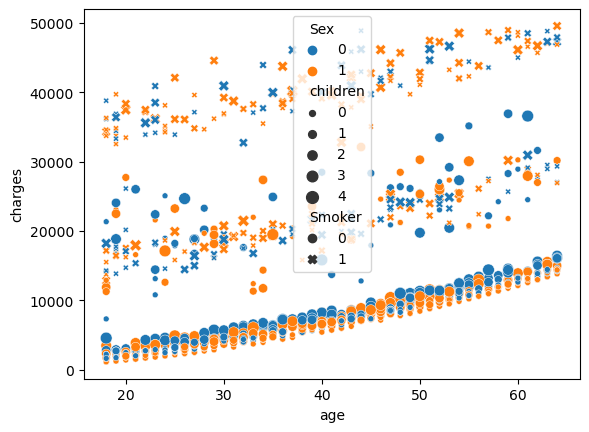

In [23]:
sns.scatterplot(data=new_df, x='age', y='charges', hue='Sex' , style = 'Smoker' , size =  'children')

# Skewness removing process :

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

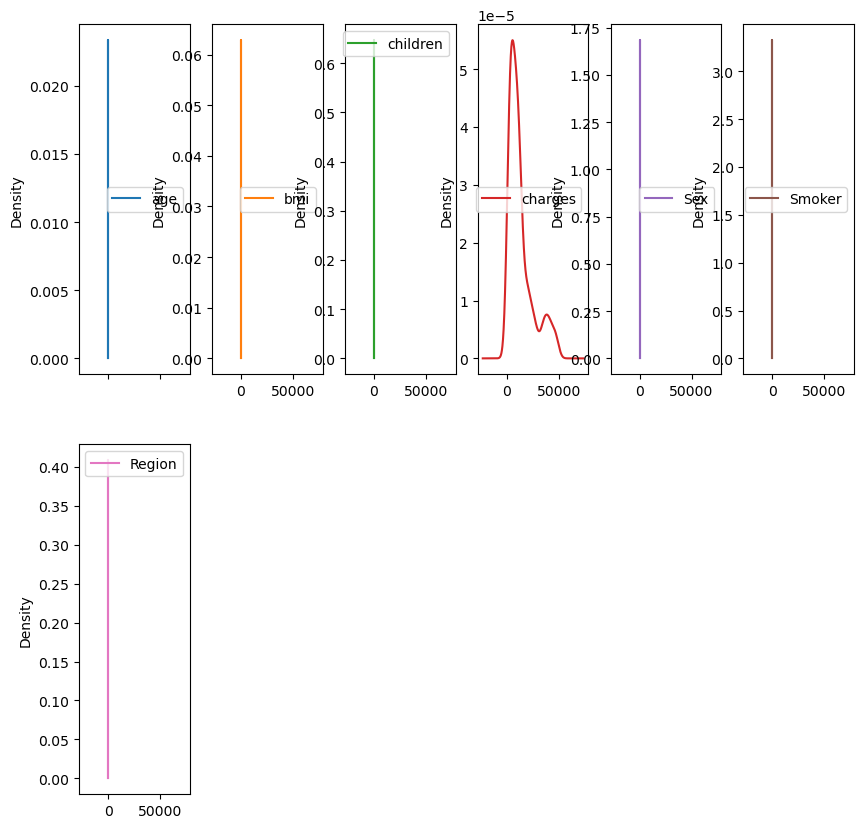

In [24]:
new_df.plot(kind = 'kde', subplots = True ,layout = (2,6), figsize = (10,10))
# So only Charges  has the skewness which  is considerable

# Correlartion Checking :

In [25]:
dfcorr = new_df.corr()
dfcorr

,age,bmi,children,charges,Sex,Smoker,Region
age,1.000000,0.118178,0.059100,0.305263,-0.019253,-0.029090,0.003121
bmi,0.118178,1.000000,0.029916,0.191453,0.042498,-0.005288,0.160126
children,0.059100,0.029916,1.000000,0.100438,0.014056,0.028844,-0.002976
charges,0.305263,0.191453,0.100438,1.000000,0.059455,0.785129,-0.007633
Sex,-0.019253,0.042498,0.014056,0.059455,1.000000,0.079058,0.003084
Smoker,-0.029090,-0.005288,0.028844,0.785129,0.079058,1.000000,-0.003474
Region,0.003121,0.160126,-0.002976,-0.007633,0.003084,-0.003474,1.000000


<Axes: >

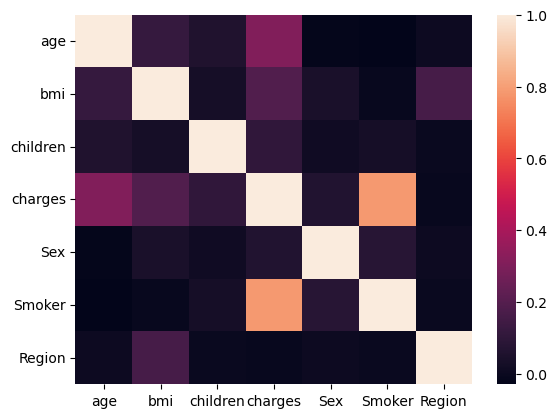

In [26]:
sns.heatmap(dfcorr)

In [27]:
# Here actually all the columns are quite important

# Trying Different Regression Models :

In [28]:
X = new_df.drop(columns = 'charges')
y = new_df['charges']

In [29]:
X_train , X_test  , y_train , y_test = train_test_split(X,y , test_size = 0.30 , random_state = 42)

# 1. Linear Regression :

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
LR = LinearRegression()
LR.fit(X_train , y_train)
y_pred_LR = LR.predict(X_test)
print('r2_score of linearRegression :', r2_score(y_test , y_pred_LR))
print('mean absolute error of linearRegression :', mean_absolute_error(y_test , y_pred_LR))
print('mean squared error of linearRegression :', mean_squared_error(y_test , y_pred_LR))

r2_score of linearRegression : 0.7727882748154014
mean absolute error of linearRegression : 4120.363141362778
mean squared error of linearRegression : 32999394.112720985


# 2. Polynomial Regression :

In [32]:
from  sklearn.preprocessing import PolynomialFeatures

In [33]:
PF = PolynomialFeatures()
X_train_poly = PF.fit_transform(X_train)
X_test_poly = PF.fit_transform(X_test)
LR.fit(X_train_poly , y_train)
y_pred_LRP = LR.predict(X_test_poly)
print('r2_score of Polynomial Regression :', r2_score(y_test , y_pred_LRP))
print('mean absolute error of Polynomial Regression :', mean_absolute_error(y_test , y_pred_LRP))
print('mean squared error of Polynomial Regression :', mean_squared_error(y_test , y_pred_LRP))

r2_score of Polynomial Regression : 0.8606553076023091
mean absolute error of Polynomial Regression : 2816.225011510587
mean squared error of Polynomial Regression : 20237909.89752569


# 3. Ridge Regression :

In [34]:
from sklearn.linear_model import Ridge

In [35]:
R = Ridge()

In [36]:
param_grid = {
    'alpha': [0.001, 0.01, 1 , 10],
    'solver': ['auto','svd','sag'],
}

grid_search = GridSearchCV(R, param_grid, cv=5)
grid_search.fit(X_train, y_train)

y_pred_R = grid_search.best_estimator_.predict(X_test)

print('r2_score of Ridge Regression :', r2_score(y_test , y_pred_R))
print('mean absolute error of Ridge Regression :', mean_absolute_error(y_test , y_pred_R))
print('mean squared error of Ridge Regression :', mean_squared_error(y_test , y_pred_R))

r2_score of Ridge Regression : 0.7727622054040464
mean absolute error of Ridge Regression : 4120.45713321295
mean squared error of Ridge Regression : 33003180.338008832


In [37]:
print('best parameters :',grid_search.best_params_)

best parameters : {'alpha': 0.001, 'solver': 'sag'}


# 4. Lasso Regression :

In [38]:
from sklearn.linear_model import Lasso

In [39]:
L = Lasso()

In [40]:
param_grid = {
    'alpha': [0.001, 0.01, 1 , 10],
    'max_iter': [500, 1000],
}

grid_search = GridSearchCV(L, param_grid, cv=5)
grid_search.fit(X_train, y_train)

y_pred_L = grid_search.best_estimator_.predict(X_test)

print('r2_score of Lasso Regression :', r2_score(y_test , y_pred_L))
print('mean absolute error of Lasso Regression :', mean_absolute_error(y_test , y_pred_L))
print('mean squared error of Lasso Regression :', mean_squared_error(y_test , y_pred_L))

r2_score of Lasso Regression : 0.7726701688487031
mean absolute error of Lasso Regression : 4125.093127432624
mean squared error of Lasso Regression : 33016547.388323173


In [41]:
print('best parameters :',grid_search.best_params_)

best parameters : {'alpha': 10, 'max_iter': 500}


# 5. SGD Regression :

In [42]:
from sklearn.linear_model  import SGDRegressor

In [43]:
SGD = SGDRegressor()

In [44]:
param_grid = {
    'penalty':['l1','l2','elasticnet'],
    'alpha':[0.0001 ,0.001, 0.01 , 1],
    'max_iter': [500, 1000],
    'eta0':[0.001,0.01],
    
}

grid_search = GridSearchCV(SGD, param_grid, cv=5)
grid_search.fit(X_train, y_train)

y_pred_SGD = grid_search.best_estimator_.predict(X_test)

print('r2_score of SGD Regression :', r2_score(y_test , y_pred_SGD))
print('mean absolute error of SGD Regression :', mean_absolute_error(y_test , y_pred_SGD))
print('mean squared error of SGD Regression :', mean_squared_error(y_test , y_pred_SGD))

r2_score of SGD Regression : 0.6683963765526801
mean absolute error of SGD Regression : 4591.396296537486
mean squared error of SGD Regression : 48160888.92619427


In [45]:
print('best parameters :',grid_search.best_params_)

best parameters : {'alpha': 0.01, 'eta0': 0.001, 'max_iter': 500, 'penalty': 'l2'}


# 6. KNN Regression :

In [46]:
from sklearn.neighbors import KNeighborsRegressor

In [47]:
knn = KNeighborsRegressor()

In [48]:
param_grid = {
    'n_neighbors':[3,4,5,6,7],
    'weights':['uniform','distance'],
    'leaf_size': [10,20,30,40],
    
}

grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

y_pred_knn = grid_search.best_estimator_.predict(X_test)

print('r2_score of KNN Regression :', r2_score(y_test , y_pred_knn))
print('mean absolute error of KNN Regression :', mean_absolute_error(y_test , y_pred_knn))
print('mean squared error of KNN Regression :', mean_squared_error(y_test , y_pred_knn))

r2_score of KNN Regression : 0.18324093999653812
mean absolute error of KNN Regression : 7600.895892298193
mean squared error of KNN Regression : 118623077.63515335


In [49]:
print('best parameters :',grid_search.best_params_)

best parameters : {'leaf_size': 20, 'n_neighbors': 7, 'weights': 'distance'}


# 7. Support Vactor Regression :

In [50]:
from sklearn.svm import SVR

In [51]:
svr = SVR(kernel='rbf', degree=3, gamma='scale')
svr.fit(X_train,y_train)
y_pred_svr = svr.predict(X_test)
print('r2_score of Support Vactor Regression :', r2_score(y_test , y_pred_svr))
print('mean absolute error of Support Vactor Regression :', mean_absolute_error(y_test , y_pred_svr))
print('mean squared error of Support Vactor Regression :', mean_squared_error(y_test , y_pred_svr))

r2_score of Support Vactor Regression : -0.1225574343811271
mean absolute error of Support Vactor Regression : 8451.92739143978
mean squared error of Support Vactor Regression : 163036107.23087245


# 8. DecisionTree Regressor :

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
dtr = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth= 6, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=16)
dtr.fit(X_train,y_train)
y_pred_dtr = dtr.predict(X_test)
print('r2_score of Decision Tree Regression :', r2_score(y_test , y_pred_dtr))
print('mean absolute error of Decision Tree Regression :', mean_absolute_error(y_test , y_pred_dtr))
print('mean squared error of Decision Tree Regression :', mean_squared_error(y_test , y_pred_dtr))

r2_score of Decision Tree Regression : 0.8629759216140943
mean absolute error of Decision Tree Regression : 2596.1964886455903
mean squared error of Decision Tree Regression : 19900872.46560538


# 9. Random Forest Regresssor :

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
rfr = RandomForestRegressor(n_estimators=500,  criterion='squared_error', max_depth= 5, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes= 16)
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)
print('r2_score of Random Forest Regression :', r2_score(y_test , y_pred_rfr))
print('mean absolute error of Random Forest Regression :', mean_absolute_error(y_test , y_pred_rfr))
print('mean squared error of Random Forest Regression :', mean_squared_error(y_test , y_pred_rfr))

r2_score of Random Forest Regression : 0.8790200160262169
mean absolute error of Random Forest Regression : 2444.646270433302
mean squared error of Random Forest Regression : 17570687.285869654


# 10 . Gradient Boosting Regressor :

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

In [63]:
gbr = GradientBoostingRegressor( learning_rate=0.01, n_estimators=500, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,  max_depth=3)
gbr.fit(X_train,y_train)
y_pred_gbr = gbr.predict(X_test)
print('r2_score of Gradient Boosting Regression :', r2_score(y_test , y_pred_gbr))
print('mean absolute error of Gradient Boosting Regression :', mean_absolute_error(y_test , y_pred_gbr))
print('mean squared error of Gradient  Boosting Regression :', mean_squared_error(y_test , y_pred_gbr))

r2_score of Gradient Boosting Regression : 0.8842635907736464
mean absolute error of Gradient Boosting Regression : 2284.713565835847
mean squared error of Gradient  Boosting Regression : 16809129.802384358


# 11. XG Boost :

In [64]:
import xgboost as xgb
dtrain = xgb.DMatrix( X_train, label= y_train)
params = {
    'eta': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.7,
    'silent': 1
}

# Train the model
model = xgb.train(params,dtrain , num_boost_round=100)

In [66]:
y_pred_gb = model.predict(xgb.DMatrix( X_test, label= y_test))
r2_score(y_test , y_pred_gb.round())

0.8686439023929339

# 12. Voting Regressor :

In [67]:
from sklearn.ensemble import VotingRegressor

In [70]:
voting_rgr = VotingRegressor(
   estimators = [
       ('lr', LinearRegression()),
       ('dtr', DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth= 6, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=16)),
       ('rfr', RandomForestRegressor(n_estimators=500,  criterion='squared_error', max_depth= 5, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes= 16)),
       ('gbr',GradientBoostingRegressor( learning_rate=0.01, n_estimators=500, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,  max_depth=3))
   ])
voting_rgr.fit(X_train , y_train)
voting_pred = voting_rgr.predict(X_test)
accuracy = r2_score(y_test, voting_pred)
print("r2_score of Voting Classifier :", accuracy)


r2_score of Voting Classifier : 0.8763580036008314


# 13. Stacking Regressor :

In [71]:
from sklearn.ensemble import StackingRegressor

In [72]:
stacking_rgr = StackingRegressor(
   estimators = [
       ('lr', LinearRegression()),
       ('Lasso', Lasso()),
       ('Ridge', Ridge()),
       ('dtr', DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth= 6, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=16)),
       ('rfr', RandomForestRegressor(n_estimators=500,  criterion='squared_error', max_depth= 5, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes= 16)),
       ('gbr',GradientBoostingRegressor( learning_rate=0.01, n_estimators=500, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,  max_depth=3))
   ],
   final_estimator = RandomForestRegressor(n_estimators=500,  criterion='squared_error', max_depth= 5, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes= 16),
   cv = 5
)


In [73]:
stacking_rgr.fit(X_train , y_train)
stacking_pred = stacking_rgr.predict(X_test)
accuracy = r2_score(y_test, stacking_pred)
print("r2_score of stacking Classifier :", accuracy)


r2_score of stacking Classifier : 0.8794126579596802


In [74]:
# So here , Gradient Boosting is giving me the best results . Hence I will use Gradient Boosting Regressor Model

# Creating a prediction function :

In [85]:
def Medical_Cost_Insurance_Prediction(p):
    p = p.reshape(1,-1)
    pred = gbr.predict(p)
    print('Medical cost insurance is :',pred)
    

In [ ]:
def Medical_Cost_Presiction():

  age = int(input("Enter your age: "))
  bmi = float(input("Enter your BMI: "))
  children = int(input("Enter the number of children: "))

  sex = input("Enter your sex (male or female): ").lower()
  if sex == "male":
    sex_code = 1
  elif sex == "female":
    sex_code = 0
  else:
    raise ValueError("Invalid sex entered. Please enter 'male' or 'female'.")

  smoker = input("Are you a smoker (yes or no): ").lower()
  if smoker == "yes":
    smoker_code = 1
  elif smoker == "no":
    smoker_code = 0
  else:
    raise ValueError("Invalid smoker status entered. Please enter 'yes' or 'no'.")

  region = input("Enter your region (southwest, southeast, northwest, northeast): ").lower()
  if region == "southwest":
    region_code = 3
  elif region == "southeast":
    region_code = 2
  elif region == "northwest":
    region_code = 1
  elif region == "northeast":
    region_code = 0
  else:
    raise ValueError("Invalid region entered. Please enter a valid region name.")

  return np.array([age, bmi, children, sex_code, smoker_code, region_code])

def Medical_Cost_Insurance_Prediction(p):
  
  p = p.reshape(1, -1)
  pred = gbr.predict(p)
  print('Medical cost insurance is :', pred[0]) 


if __name__ == "__main__":
  try:
    user_data = Medical_Cost_Presiction()
    Medical_Cost_Insurance_Prediction(user_data)
  except ValueError as e:
    print("Error:", e)